In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [2]:
#Reading The Final DataSet
dataset = pd.read_csv('Final_Data.csv', parse_dates=['date'])

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5376 non-null   datetime64[ns]
 1   date.1         5376 non-null   object        
 2   GS_open        5376 non-null   float64       
 3   GS_high        5376 non-null   float64       
 4   GS_low         5376 non-null   float64       
 5   GS_close       5376 non-null   float64       
 6   GS_aclose      5376 non-null   float64       
 7   GS_volume      5376 non-null   float64       
 8   MS_open        5376 non-null   float64       
 9   MS_high        5376 non-null   float64       
 10  MS_low         5376 non-null   float64       
 11  MS_close       5376 non-null   float64       
 12  MS_aclose      5376 non-null   float64       
 13  MS_volume      5376 non-null   float64       
 14  JPM_open       5376 non-null   float64       
 15  JPM_high       5376 n

In [4]:
#Dropping An Extra Column date.1
dataset = dataset.drop(columns = 'date.1')

In [5]:
columns = list(dataset.columns)
print(columns)

['date', 'GS_open', 'GS_high', 'GS_low', 'GS_close', 'GS_aclose', 'GS_volume', 'MS_open', 'MS_high', 'MS_low', 'MS_close', 'MS_aclose', 'MS_volume', 'JPM_open', 'JPM_high', 'JPM_low', 'JPM_close', 'JPM_aclose', 'JPM_volume', 'WFC_open', 'WFC_high', 'WFC_low', 'WFC_close', 'WFC_aclose', 'WFC_volume', 'C_open', 'C_high', 'C_low', 'C_close', 'C_aclose', 'C_volume', 'BAC_open', 'BAC_high', 'BAC_low', 'BAC_close', 'BAC_aclose', 'BAC_volume', 'GS_SMA7', 'GS_SMA21', 'GS_EMA21', 'GS_MACD_Hist', 'GS_MACD', 'GS_MACD_sig', 'GS_Lower', 'GS_Upper', 'GS_Middle', 'GS_SlowD', 'GS_SlowK', 'GS_RSI', 'GS_ADX', 'GS_CCI', 'GS_aroon_up', 'GS_aroon_down', 'GS_AD', 'GS_OBV']


In [6]:
col1 = ['date','GS_close','GS_open', 'GS_high', 'GS_low','GS_aclose', 'GS_volume', 'MS_open', 'MS_high', 'MS_low', 'MS_close', 'MS_aclose', 'MS_volume', 'JPM_open', 'JPM_high', 'JPM_low', 'JPM_close', 'JPM_aclose', 'JPM_volume', 'WFC_open', 'WFC_high', 'WFC_low', 'WFC_close', 'WFC_aclose', 'WFC_volume', 'C_open', 'C_high', 'C_low', 'C_close', 'C_aclose', 'C_volume', 'BAC_open', 'BAC_high', 'BAC_low', 'BAC_close', 'BAC_aclose', 'BAC_volume', 'GS_SMA7', 'GS_SMA21', 'GS_EMA21', 'GS_MACD_Hist', 'GS_MACD', 'GS_MACD_sig', 'GS_Lower', 'GS_Upper', 'GS_Middle', 'GS_SlowD', 'GS_SlowK', 'GS_RSI', 'GS_ADX', 'GS_CCI', 'GS_aroon_up', 'GS_aroon_down', 'GS_AD', 'GS_OBV']

In [7]:
#Rearranging Columns Of DataSet For Easy ETL Operation
dataset = dataset.reindex(columns = col1)

In [8]:
dataset.head()

,date,GS_close,GS_open,GS_high,GS_low,GS_aclose,GS_volume,MS_open,MS_high,MS_low,...,GS_Middle,GS_SlowD,GS_SlowK,GS_RSI,GS_ADX,GS_CCI,GS_aroon_up,GS_aroon_down,GS_AD,GS_OBV
0,1999-12-17,80.19,80.19,80.56,78.44,62.584489,542100.0,126.00,131.88,125.88,...,61.3881,33.0107,31.7277,58.4142,32.1890,43.7838,12.0,0.0,1.773897e+06,7640300.0
1,1999-12-20,81.88,82.00,83.63,80.75,63.903453,1302600.0,131.75,132.62,128.25,...,61.4638,32.7261,44.2862,61.6881,32.2930,134.1180,100.0,0.0,1.493476e+06,8942900.0
2,1999-12-21,80.94,80.63,83.00,79.50,63.169828,1189900.0,128.50,131.50,126.75,...,61.5125,44.3939,57.1678,58.9101,31.6787,88.0679,96.0,36.0,1.282694e+06,7753000.0
3,1999-12-22,79.69,81.00,81.38,79.13,62.194262,526800.0,130.00,130.38,128.88,...,61.5882,51.3161,52.4943,55.3411,30.9034,41.9883,92.0,32.0,1.018123e+06,7226200.0
4,1999-12-23,81.00,81.00,82.44,80.69,63.216655,532000.0,131.00,132.00,130.81,...,61.7393,51.7285,45.5235,58.1993,30.5611,84.7023,88.0,28.0,6.746031e+05,7758200.0


In [9]:
#Sperating Date's From The DataSet For Easy Operation When It Passes Through an LSTM Network
datetime_series = pd.to_datetime(dataset['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='date')
dataset = dataset.drop(columns='date')

In [10]:
#Seperating The Dependent and Independent Variables
X_value = pd.DataFrame(dataset.iloc[:, 1:])
Y_value = pd.DataFrame(dataset.iloc[:, 0])

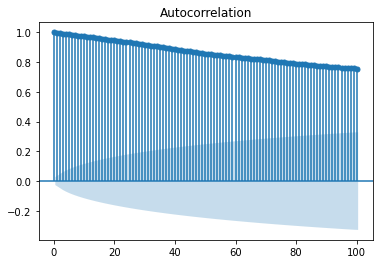

In [11]:
#Plotting an AutoCorrelation Plot
sm.graphics.tsa.plot_acf(Y_value.squeeze(), lags=100)
plt.show()

In [12]:
#Scaling The Entire Data Between -1 to 1 as the neural network like LSTM responds well to these values.
X_scaler = MinMaxScaler(feature_range=(-1, 1))
Y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
Y_scaler.fit(Y_value)

X_scale_dataset = X_scaler.fit_transform(X_value)
Y_scale_dataset = Y_scaler.fit_transform(Y_value)

#Saving the scaler to reuse to rescale the predicted values to original form.
dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(Y_scaler, open('Y_scaler.pkl', 'wb'))

In [13]:
n_steps_in = 17
n_features = X_value.shape[1]
n_steps_out = 1

In [14]:
#Splitting Data Function_1
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 17 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

In [15]:
#Splitting Data Function_1
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

In [16]:
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [17]:
X, Y, Yc = get_X_y(X_scale_dataset, Y_scale_dataset)
X_train, X_test, = split_train_test(X)
Y_train, Y_test, = split_train_test(Y)
Yc_train, Yc_test, = split_train_test(Yc)
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)

In [19]:
print('X shape: ', X.shape)
print('y shape: ', Y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', Y_train.shape)
print('y_c_train shape: ', Yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', Y_test.shape)
print('y_c_test shape: ', Yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

np.save("X_train.npy", X_train)
np.save("y_train.npy", Y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", Y_test)
np.save("yc_train.npy", Yc_train)
np.save("yc_test.npy", Yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)

X shape:  (5359, 17, 53)
y shape:  (5359, 1)
X_train shape:  (3751, 17, 53)
y_train shape:  (3751, 1)
y_c_train shape:  (3751, 17, 1)
X_test shape:  (1608, 17, 53)
y_test shape:  (1608, 1)
y_c_test shape:  (1608, 17, 1)
index_train shape: (3751,)
index_test shape: (1608,)
